{156492: 0.07557034492492676, 32205: 0.015316446622212728, 168955: 0.08117489020029704, 8255: 0.003944039344787598, 115447: 0.055450638135274254, 137644: 0.06734907627105713}
{156492: 0.03826916217803955, 32205: 0.007703423500061035, 168955: 0.04096353054046631, 8255: 0.0019824902216593423, 115447: 0.028253992398579914, 137644: 0.03389577070871989}
Figure(640x480)


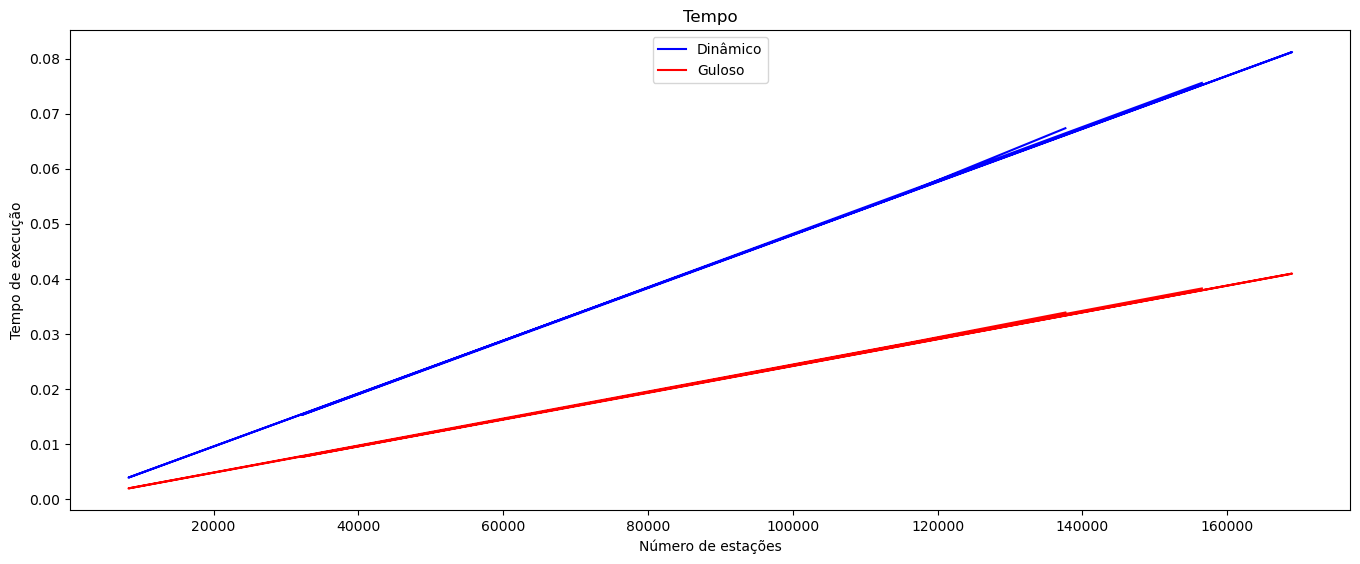

In [6]:
import random
import time
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline
# plt.show()

# e é o array que armazena o custo de entrada em cada linha
# a é o array de custo de cada estação
# t é o array de custo de troca de linha
# x é o array que armazena o custo de saída em cada linha

dynamicDict = {}
greedyDict = {}
dynamicCostDict = {}
greedyCostDict = {} 

# ALGORITMO DE RESOLUÇÃO UTILIZANDO PROGRAMAÇÃO DINÂMICA
def fastestWayStation(a, t, e, x):
  startTime = time.time()
  NUM_STATION = len(a[0])
  T1 = [0 for i in range(NUM_STATION)]
  T2 = [0 for i in range(NUM_STATION)]
  line = [0 for i in range(NUM_STATION)]  # Armazena a linha escolhida em cada estação
  path = []  # Armazena o caminho percorrido
  
  T1[0] = e[0] + a[0][0]
  T2[0] = e[1] + a[1][0]
  
  for i in range(1, NUM_STATION):
    if T1[i-1] + a[0][i] <= T2[i-1] + t[1][i] + a[0][i]:
      T1[i] = T1[i-1] + a[0][i]
      line[i] = 1
    else:
      T1[i] = T2[i-1] + t[1][i] + a[0][i]
      line[i] = 2
    
    if T2[i-1] + a[1][i] <= T1[i-1] + t[0][i] + a[1][i]:
      T2[i] = T2[i-1] + a[1][i]
      line[i] = 2
    else:
      T2[i] = T1[i-1] + t[0][i] + a[1][i]
      line[i] = 1
  
  # Determinar o caminho percorrido
  lastLine = 1 if T1[NUM_STATION-1] + x[0] <= T2[NUM_STATION-1] + x[1] else 2
  path.append(lastLine)
  
  for i in range(NUM_STATION-1, 0, -1):
    lastLine = line[i]
    path.append(lastLine)
  
  path.reverse()
  
  endTime = time.time()  # Registra o tempo de término da execução
  executionTime = endTime - startTime
  # Retornar o valor mínimo e o caminho percorrido
  return min(T1[NUM_STATION-1] + x[0], T2[NUM_STATION-1] + x[1]), path, executionTime


# ALGORITMO DE RESOLUÇÃO UTILIZANDO GREEDY APPROACH
def greedyFastestWayStation(a, t, e, x):
  startTime = time.time()
  NUM_STATION = len(a[0])
  line = [0 for i in range(NUM_STATION)]  # Armazena a linha escolhida em cada estação
  path = []  # Armazena o caminho percorrido
  cost = 0  # Armazena o custo total da solução gulosa
  
  for i in range(1, NUM_STATION):
    if a[0][i] + t[0][i-1] <= a[1][i] + t[1][i-1]:
      line[i] = 1
      cost += a[0][i] + t[0][i-1]
    else:
      line[i] = 2
      cost += a[1][i] + t[1][i-1]
  
  # Adiciona o custo das estações finais
  cost += x[0] if e[0] + a[0][0] <= e[1] + a[1][0] else x[1]
  
  # Determinar o caminho percorrido
  lastLine = 1 if e[0] + a[0][0] <= e[1] + a[1][0] else 2
  path.append(lastLine)
  
  for i in range(1, NUM_STATION):
    lastLine = line[i]
    path.append(lastLine)

  path.reverse()
  endTime = time.time() # Registra o tempo de término da execução
  executionTime = endTime - startTime # Calcula o tempo de execução
  # Retornar o custo e o caminho percorrido
  return cost, path, executionTime

# Função para imprimir o resultado
def printStations(result, n): 
  print(f'custo total: {result[0]}')
  print(f'tempo de execução: {result[2]} segundos')
  print("Caminho percorrido:")
  for i in range(n): 
    print(f'Estação {i+1}, linha {result[1][i]}') 
  print()

def createArray(n, var=0):
  array = []
  for i in range(0, n):
    if i == 0 and var == 1:
      array.append(0)
    array.append(random.randint(1, 10))
  return array


def teste():
  testes = random.randint(5, 10)
  for _ in range(0, testes):
    n = random.randint(100, 205000)
    while n in dynamicDict.keys():
      n = random.randint(100, 205000)
    c = []
    d = []
    dynamicArray = []
    greedyArray = []
    for _ in range(0, testes):
      a = [createArray(n), createArray(n)]
      t = [createArray(n, 1), createArray(n, 1)]
      e = createArray(2)
      x = createArray(2)
      dynamicArray.append(fastestWayStation(a, t, e, x)[2])
      greedyArray.append(greedyFastestWayStation(a, t, e, x)[2])
    dynamicDict[n] = reduce(lambda x, y: (x+y), dynamicArray, 0)/testes
    greedyDict[n] = reduce(lambda x, y: (x+y), greedyArray, 0)/testes
    c.clear()
    d.clear()
    dynamicArray.clear()
    greedyArray.clear()
  print(dynamicDict)
  print(greedyDict)

def testeCost():
  testes = random.randint(5, 10)
  for _ in range(0, testes):
    n = random.randint(100, 205000)
    while n in dynamicDict.keys():
      n = random.randint(100, 205000)
    c = []
    d = []
    dynamicCost = []
    greedyCost = []
    for _ in range(0, testes):
      a = [createArray(n), createArray(n)]
      t = [createArray(n, 1), createArray(n, 1)]
      e = createArray(2)
      x = createArray(2)
      dynamicCost.append(fastestWayStation(a, t, e, x)[0])
      greedyCost.append(greedyFastestWayStation(a, t, e, x)[0])
    dynamicCostDict[n] = reduce(lambda x, y: (x+y), dynamicCost, 0)/testes
    greedyCostDict[n] = reduce(lambda x, y: (x+y), greedyCost, 0)/testes
    c.clear()
    d.clear()
    dynamicCost.clear()
    greedyCost.clear()
  print(dynamicCostDict)
  print(greedyCostDict)


dynamicX = []
greedyX = []
dynamicY = []
greedyY = []

dynamicCostX = []
greedyCostX = []
dynamicCostY = []
greedyCostY = []

def getdynamicX(array, arrayToAppend):
  for key in array.keys():
    arrayToAppend.append(key)

def getgreedyX(array, arrayToAppend):
  for key in array.keys():
    arrayToAppend.append(key)

def getdynamicY(array, arrayToAppend):
  for key in array.keys():
    arrayToAppend.append(array[key])

def getgreedyY(array, arrayToAppend):
  for key in array.keys():
    arrayToAppend.append(array[key])

# TESTE DE TEMPO DE EXECUÇÃO
teste()
getdynamicX(dynamicDict, dynamicX)
getgreedyX(greedyDict, greedyX)
getdynamicY(dynamicDict, dynamicY)
getgreedyY(greedyDict, greedyY)

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.plot(dynamicX,dynamicY,color="blue", label = 'Dinâmico')
ax.plot(greedyX,greedyY,color="red", label = 'Guloso')
leg = plt.legend(loc='upper center')
ax.set_title("Tempo")
ax.set_xlabel("Número de estações")
ax.set_ylabel("Tempo de execução")

print(fig)

{51715: 249179.0, 65877: 317961.0, 176828: 852636.0, 162777: 784653.5, 141025: 680355.875, 45970: 221525.25, 187601: 904742.125, 173724: 837814.0}
{51715: 449131.375, 65877: 572371.875, 176828: 1534795.5, 162777: 1413285.625, 141025: 1224192.25, 45970: 398962.75, 187601: 1628153.625, 173724: 1508161.5}
Figure(640x480)


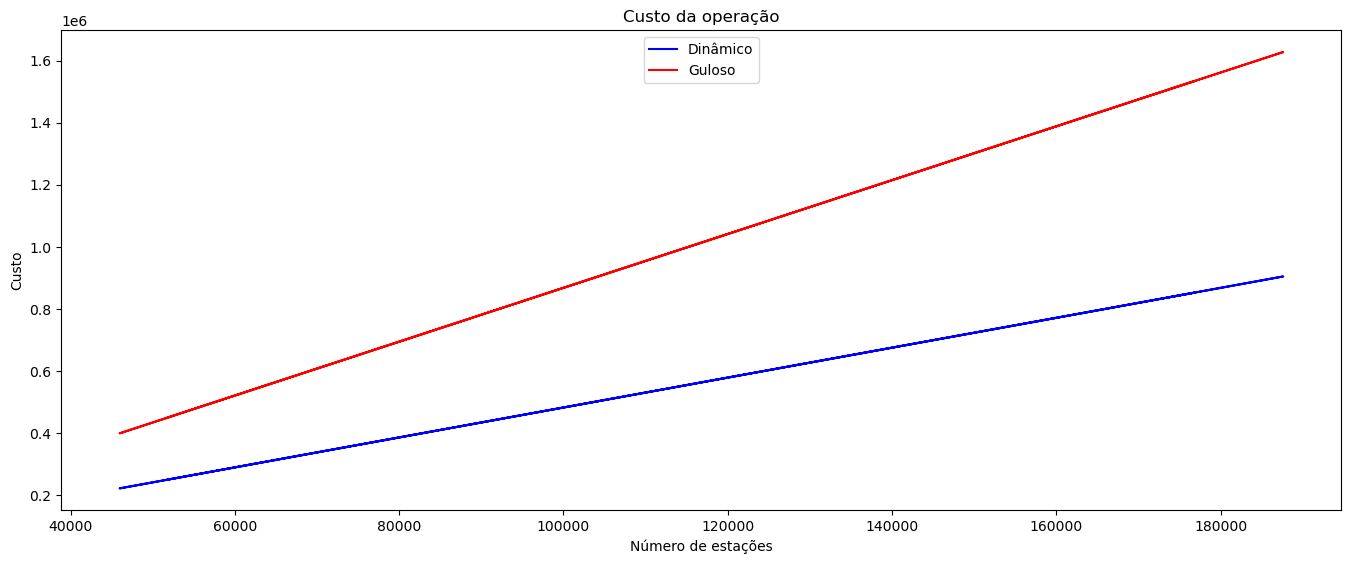

In [7]:
# TESTE DE CUSTO
testeCost()
getdynamicX(dynamicCostDict, dynamicCostX)
getgreedyX(greedyCostDict, greedyCostX)
getdynamicY(dynamicCostDict, dynamicCostY)
getgreedyY(greedyCostDict, greedyCostY)

fig2 = plt.figure()
ax = fig2.add_axes([0,0,2,1])
ax.plot(dynamicCostX,dynamicCostY,color="blue", label = 'Dinâmico')
ax.plot(greedyCostX,greedyCostY,color="red", label = 'Guloso')
leg = plt.legend(loc='upper center')
ax.set_title("Custo da operação")
ax.set_xlabel("Número de estações")
ax.set_ylabel("Custo")

print(fig2)